📊 分类报告（Classification Report）:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       532
           1       0.99      1.00      0.99      1254

    accuracy                           0.99      1786
   macro avg       0.99      0.99      0.99      1786
weighted avg       0.99      0.99      0.99      1786



C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:53] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


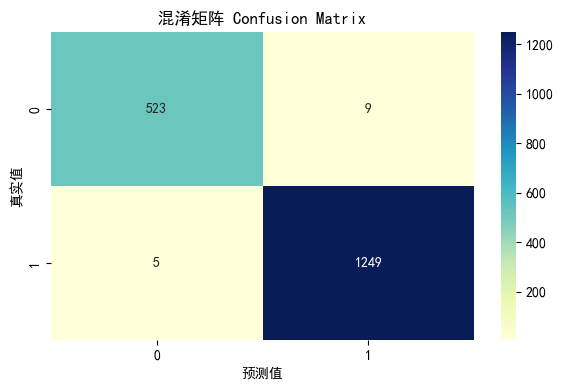

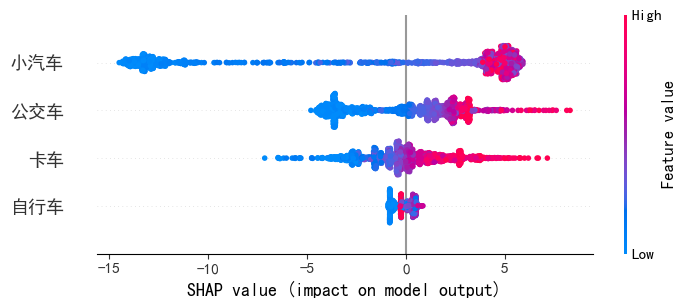

C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
C:\Users\Administrator\.conda\envs\ssdasdasd00000\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


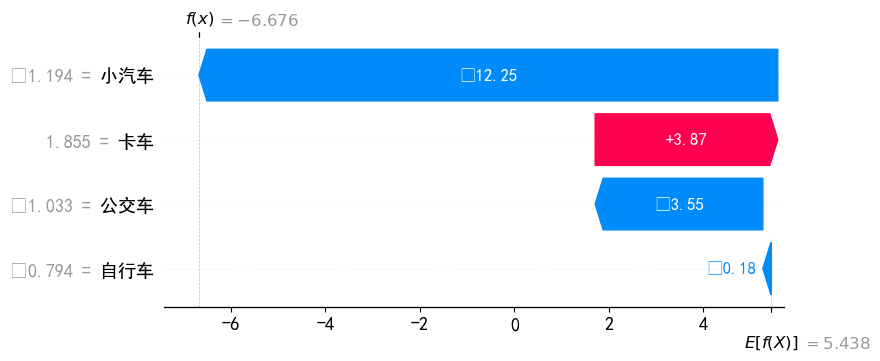

In [3]:
# 🚦 Day 2：交通状态预测进阶（XGBoost + SHAP）

# ✅ 1. 导入所需库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']        # 设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False    

# 模型与解释器
from xgboost import XGBClassifier
import shap

# ✅ 2. 读取交通数据
df = pd.read_csv("交通数据_两个月_含时间字段.csv")

# ✅ 3. 构造目标列（如果没有 status 列）
df['status'] = ((df['小汽车数量'] + df['公交车数量'] + df['卡车数量']) > 60).astype(int)

# ✅ 4. 特征选择
feature_cols = ['小汽车数量', '卡车数量', '公交车数量', '自行车数量']
X = df[feature_cols]
y = df['status']

# ✅ 5. 特征标准化（XGBoost 可选标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ 6. 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ✅ 7. 建立 XGBoost 模型
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# ✅ 8. 模型评估
y_pred = xgb_model.predict(X_test)
print("📊 分类报告（Classification Report）:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('混淆矩阵 Confusion Matrix')
plt.xlabel('预测值')
plt.ylabel('真实值')
plt.tight_layout()
plt.show()

# ✅ 9. 使用 SHAP 进行模型解释
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# ✅ 10. SHAP 解释图（特征重要性 + 影响方向）
X_named = pd.DataFrame(X_test, columns=['小汽车', '卡车', '公交车', '自行车'])
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_named)
shap.plots.beeswarm(shap_values)


# ✅ 11. 解释单个样本预测结果（举例第5个）
shap.plots.waterfall(shap_values[5], max_display=10)  # 瀑布图：展示特征如何推动预测输出
